In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [83]:
clinical_trial = "clinicaltrial_data.csv"
trial_df = pd.read_csv(clinical_trial)

mouse_data = "mouse_drug_data.csv"
mouse_df = pd.read_csv(mouse_data)

In [84]:
full_data_set = pd.merge(trial_df, mouse_df, on= "Mouse ID")

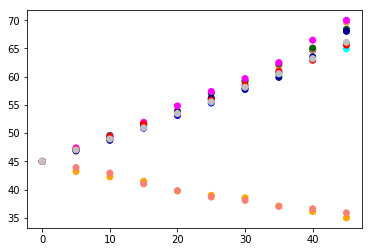

In [85]:
size_by_drug_df = full_data_set.groupby(['Timepoint','Drug'], as_index=False).agg({"Tumor Volume (mm3)": "mean"})

colors = ("aqua", "blue", "coral", "darkgreen","darkblue", "magenta", "orange", "red", "salmon", "silver")

groups = full_data_set["Drug"].unique()

plt.scatter(size_by_drug_df["Timepoint"], size_by_drug_df["Tumor Volume (mm3)"], c=colors, label=groups)


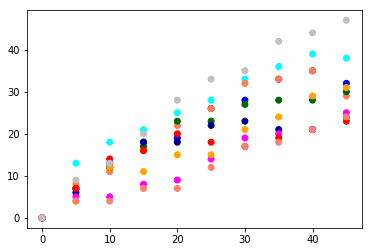

In [105]:
size_by_drug_df = full_data_set.groupby(['Timepoint','Drug'], as_index=False).agg({"Metastatic Sites": "sum"})

colors = ("aqua", "blue", "coral", "darkgreen","darkblue", "magenta", "orange", "red", "salmon", "silver")

groups = full_data_set["Drug"].unique()

plt.scatter(size_by_drug_df["Timepoint"], size_by_drug_df["Metastatic Sites"], c=colors, label=groups)

In [156]:
alive_df = full_data_set.groupby(['Mouse ID'], as_index=False).agg({"Tumor Volume (mm3)": "count"})

count_df = pd.DataFrame(alive_df['Tumor Volume (mm3)'].value_counts())

count_df= count_df.reset_index()

count_df = count_df.rename( columns = {'index':'Number of Observations', 'Tumor Volume (mm3)':'Mouse Count'} )

count_df = count_df[:-2]

count_df = count_df.sort_values('Number of Observations')

count_df= count_df.reset_index()

count_df["Num Still Alive"] = count_df["Mouse Count"].sum() - count_df["Mouse Count"].cumsum() + count_df["Mouse Count"]

count_df["Timepoint"] = (count_df["Number of Observations"] - 1)* 5

count_df


,index,Number of Observations,Mouse Count,Num Still Alive,Timepoint
0,3,1,17,246,0
1,1,2,20,229,5
2,4,3,15,209,10
3,5,4,14,194,15
4,2,5,17,180,20
5,6,6,12,163,25
6,7,7,10,151,30
7,9,8,7,141,35
8,8,9,8,134,40
9,0,10,126,126,45


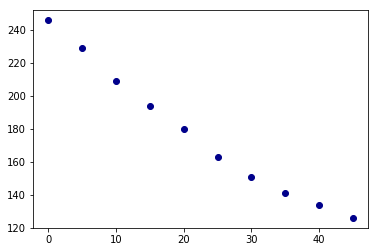

In [160]:
#colors = ("aqua", "blue", "coral", "darkgreen","darkblue", "magenta", "orange", "red", "salmon", "silver")

groups = full_data_set["Drug"].unique()

plt.scatter(count_df["Timepoint"], count_df["Num Still Alive"], c='darkblue', label=groups)

In [ ]:
size_by_drug_df = full_data_set.groupby(['Timepoint','Drug'], as_index=False).agg({"Metastatic Sites": "mean"})

#colors = ("aqua", "blue", "coral", "darkgreen","darkblue", "magenta", "orange", "red", "salmon", "silver")

#groups = full_data_set["Drug"].unique()

#plt.scatter(size_by_drug_df["Timepoint"], size_by_drug_df["Metastatic Sites"], c=colors, label=groups)

In [140]:
full_data_set['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [129]:
full_data_set

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,x903,0,45.000000,0,Stelasyn
1,x903,5,45.722240,0,Stelasyn
2,x903,10,39.303044,0,Stelasyn
3,x903,15,38.279726,0,Stelasyn
4,x903,20,38.764771,0,Stelasyn
5,x903,25,39.425939,0,Stelasyn
6,x903,30,40.158812,0,Stelasyn
7,x903,35,40.951971,0,Stelasyn
8,x903,40,41.702930,0,Stelasyn
9,x903,45,42.189825,0,Stelasyn
